In [1]:
import os
import numpy as np
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
def load_images_from_folder(folder, label, desired_size=256):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            # Calculate padding
            pixels = np.array(img)
            min_pixel, max_pixel = pixels.min(), pixels.max()
            padding = int((max_pixel - min_pixel) / 10)  # Example padding calculation

            # Add padding to the image
            img = ImageOps.expand(img, border=padding, fill='black')
            
            # Resize to the desired size
            img = img.resize((desired_size, desired_size))

            images.append(np.array(img).flatten())  # Convert image to 1-D array
            labels.append(label)
    return images, labels

# Load images from two directories
class0_images, class0_labels = load_images_from_folder('Data/public/non_globally_sclerotic_glomeruli', 0 )
class1_images, class1_labels = load_images_from_folder('Data/public/globally_sclerotic_glomeruli', 1)




In [3]:
class0_images[1].shape

(262144,)

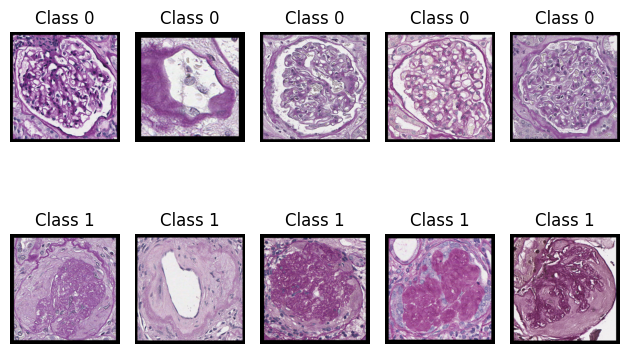

In [4]:
import matplotlib.pyplot as plt

# Display images from class0_images
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(class0_images[i].reshape(256, 256, 4))
    plt.axis('off')
    plt.title('Class 0')
    
# Display images from class1_images
for i in range(5):
    plt.subplot(2, 5, i+6)
    plt.imshow(class1_images[i].reshape(256, 256 , 4))
    plt.axis('off')
    plt.title('Class 1')

plt.tight_layout()
plt.show()


(only the cell below contains an alternate padding and image loading scheme)

In [5]:
def load_images_from_folder(folder, label, max_size):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            width, height = img.size
            new_size = max(width, height)
            padded_img = Image.new('RGB', (new_size, new_size), color='white')  # Create white background
            padded_img.paste(img, ((new_size - width) // 2, (new_size - height) // 2))  # Center the original image

            rez_img = padded_img.resize(max_size)  # Resize the image



            rez_img = np.array(rez_img).flatten()  # Convert image to 1-D array
            images.append(rez_img)
            labels.append(label)
    return images, labels

# Specify the maximum size (you need to set this according to your dataset)
max_size = (256, 256)  # Example size, adjust based on your needs


# Define your folders
folder_class0 = 'Data/public/non_globally_sclerotic_glomeruli'
folder_class1 = 'Data/public/globally_sclerotic_glomeruli'
folders = [folder_class0, folder_class1]

# Load images from folders with padding
class0_images, class0_labels = load_images_from_folder(folder_class0, 0, max_size)
class1_images, class1_labels = load_images_from_folder(folder_class1, 1, max_size)

In [6]:
#length of the images
print(len(class0_images))
print(len(class1_images))

4704
1054


In [7]:
# Combine the data
images = np.array(class0_images + class1_images)
labels = np.array(class0_labels + class1_labels)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=3000)  # can increase max_iter if convergence warning appears
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#88.71% accuracy


Accuracy: 0.9053819444444444


In [9]:
#save the model
import pickle

filename = 'First_logistic_regression_model.sav'
pickle.dump(model, open(filename, 'wb'))




In [10]:
#model coefs
model.coef_.shape

(1, 262144)

In [17]:
#model intercept
model.intercept_



array([-1.77887562e-08])